In [47]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats

Example polynomial curve-fit; linear regression / discrimination for Galton height data by sex; logistic regression / discrimination for Galton height data.

In [48]:
x = np.arange(20)

In [49]:
x.shape

(20,)

In [51]:
# Here I construct X with the powers of x from 0 to 5:
X = np.vstack((np.ones(len(x)),x, x**2, x**3, x**4, x**5)).T
X

array([[1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00,
        1.000000e+00, 1.000000e+00],
       [1.000000e+00, 2.000000e+00, 4.000000e+00, 8.000000e+00,
        1.600000e+01, 3.200000e+01],
       [1.000000e+00, 3.000000e+00, 9.000000e+00, 2.700000e+01,
        8.100000e+01, 2.430000e+02],
       [1.000000e+00, 4.000000e+00, 1.600000e+01, 6.400000e+01,
        2.560000e+02, 1.024000e+03],
       [1.000000e+00, 5.000000e+00, 2.500000e+01, 1.250000e+02,
        6.250000e+02, 3.125000e+03],
       [1.000000e+00, 6.000000e+00, 3.600000e+01, 2.160000e+02,
        1.296000e+03, 7.776000e+03],
       [1.000000e+00, 7.000000e+00, 4.900000e+01, 3.430000e+02,
        2.401000e+03, 1.680700e+04],
       [1.000000e+00, 8.000000e+00, 6.400000e+01, 5.120000e+02,
        4.096000e+03, 3.276800e+04],
       [1.000000e+00, 9.000000e+00, 8.100000e+01, 7.290000e+02,
        6.561000e+03, 5.904

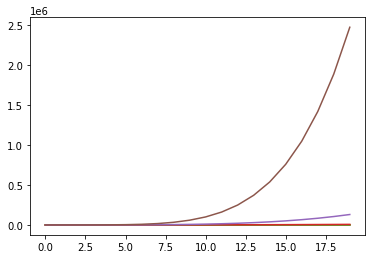

In [52]:
# They don't look very different from each other:
plt.plot(X)

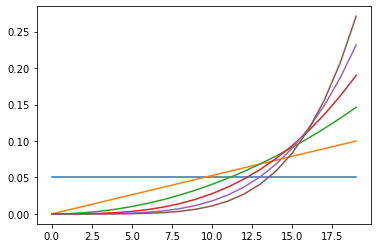

In [53]:
# Dividing by the total doesn't help too much:
plt.plot(X / X.sum(axis=0))

In [54]:
# For kicks, I can take the eigenvalue decomposition of X^T X.
# This will tell me something about how similar some components are 
# to others.
val, vec = np.linalg.eig(np.dot(X.T, X))

[]

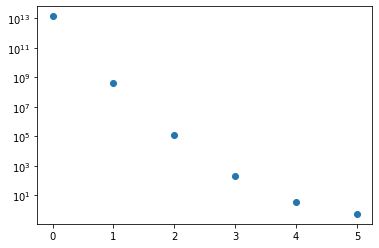

In [55]:
plt.plot(val,'o')
plt.semilogy()

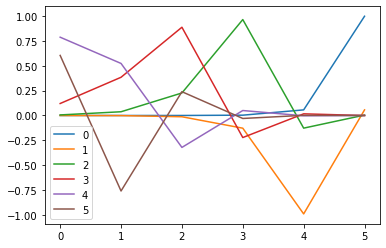

In [56]:
# Plotting the eigenvectors will tell me how much of each 
# basis vector (power of x) is in each of the set of 
# eigenvalues: 
plt.plot(vec)
plt.legend(np.arange(6))

In [57]:
# From this we see that one eigenvector is mostly x^5, 
# one is mostly x^4, x^3 ... 

In [58]:
# Construct a function - a sine wave + noise at 15% the depth of the sine wave
y = np.sin(2*np.pi * x / 20)  + np.random.normal(size=x.shape)*.3
ytrue = np.sin(2*np.pi * x / 20) 


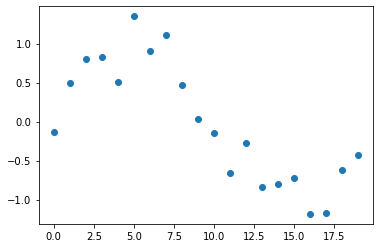

In [59]:
plt.plot(x,y, 'o')

In [60]:
import numpy.linalg
w = np.linalg.lstsq(X,y)

/var/folders/mx/y31t86kn4_xbvbmf4k8f7xd00000gp/T/ipykernel_31443/1998329285.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w = np.linalg.lstsq(X,y)


In [61]:
w[0]

array([-7.79805404e-02,  5.28565754e-01, -6.68120788e-02,  2.10432073e-05,
        1.81702771e-04, -4.08555071e-06])

Text(0.5, 0, 'Coefficient number = power of x')

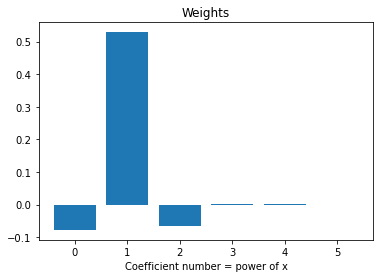

In [63]:
plt.bar(np.arange(len(w[0])), w[0])
plt.title("Weights")
plt.xlabel("Coefficient number = power of x")

In [64]:
# Build the fitted function
yfit = w[0][0] +w[0][1]*x +w[0][2] * x**2 + w[0][3]*x **3  +w[0][4]*x **4 +w[0][5]*x **5

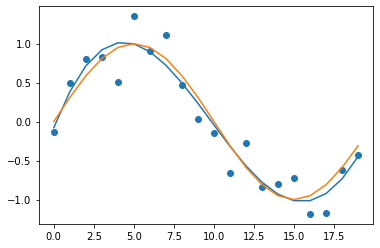

In [65]:
plt.scatter(x,y)
plt.plot(x, yfit)
plt.plot(x, ytrue)

In [ ]:
# Ready to declare victory? 

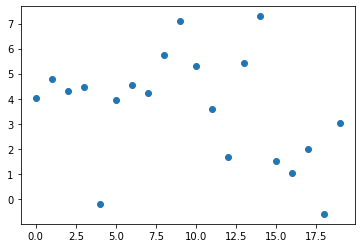

In [66]:
#  Hmm.  What if our function has only terms of x & x^2 ? 
y2  = x -0.05*x**2 + np.random.normal(size=x.shape)*2
y2perfect = x - 0.05*x**2 
plt.scatter(x, y2)

/var/folders/mx/y31t86kn4_xbvbmf4k8f7xd00000gp/T/ipykernel_31443/2804994055.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w2 = np.linalg.lstsq(X,y2)


array([ 4.53766206e+00, -3.81679275e-01, -9.64215426e-02,  4.33787044e-02,
       -3.93406743e-03,  1.02993587e-04])

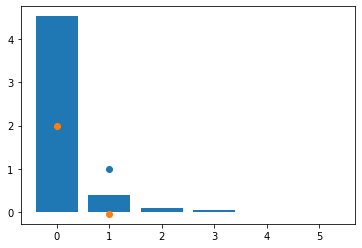

In [67]:
w2 = np.linalg.lstsq(X,y2)
plt.bar(np.arange(len(w2[0])), np.abs(w2[0]))
plt.plot([[1, 2], [1, -.05]], 'o')
#plt.semilogy()
w2[0]

In [ ]:
w2[0]

Text(0.5, 1.0, 'Orange: original parabola\n Green: original + noise\n Blue: 5th order fit')

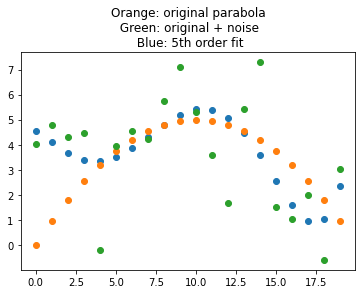

In [104]:
opt= w2[0]
plt.scatter(x,  np.dot(X, opt), label = "Polynomial - 5th order - fit" )
plt.scatter(x,   y2perfect, label="x-0.05x^2")
plt.scatter(x, y2, label="Noisy data")
plt.title("Orange: original parabola\n Green: original + noise\n Blue: 5th order fit")

In [69]:
np.dot(X, opt)

array([4.53766206, 4.09910887, 3.67599769, 3.40242335, 3.34278153,
       3.50412799, 3.84853778, 4.30546449, 4.78409947, 5.18573109,
       5.4161039 , 5.39777796, 5.08248796, 4.46350255, 3.58798351,
       2.569345  , 1.59961279, 0.96178348, 1.04218375, 2.34282957])

In [70]:
opt2 = scipy.optimize.minimize(linear_SSE, opt.x)

NameError: name 'linear_SSE' is not defined

In [71]:
# haven't defined the sum-squared-error function in this notebook.


In [72]:
galton = pd.read_csv("../data/galton.csv")

In [73]:
galton.head()

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,1,78.5,67.0,75.43,4,1,male,73.2
1,1,78.5,67.0,75.43,4,2,female,69.2
2,1,78.5,67.0,75.43,4,3,female,69.0
3,1,78.5,67.0,75.43,4,4,female,69.0
4,2,75.5,66.5,73.66,4,1,male,73.5


In [76]:
# Add a new column that can be interpreted as a number for male / female:
galton["indicator"]= galton["gender"] == "male"
galton.head(2)

,family,father,mother,midparentHeight,children,childNum,gender,childHeight,indicator
0,1,78.5,67.0,75.43,4,1,male,73.2,True
1,1,78.5,67.0,75.43,4,2,female,69.2,False


Text(0.5, 0, 'Height')

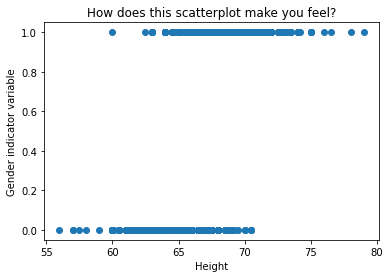

In [80]:
plt.scatter(galton.childHeight, galton.indicator)
plt.title ("How does this scatterplot make you feel?")
plt.ylabel("Gender indicator variable")
plt.xlabel("Height")

In [84]:
# We can run an out-of-the-box linear regression algorithm, that will
# give us best-fit  .slope and .intercept values.  (These are calculated
# algebraically, though we neeed not worry about that here.)  

# How many dimensions ? 
lin = scipy.stats.linregress(galton.childHeight, galton.indicator)

In [85]:
lin

LinregressResult(slope=0.1001285906458392, intercept=-6.168186756825555, rvalue=0.7167090749623363, pvalue=4.681854227158651e-148, stderr=0.0031913315544015823, intercept_stderr=0.213314117856631)

From this we read that

    slope = 0.1001285
    intercept = -6.16818
  
so 

$$ y_{linear} = -6.168 \times 0.10013 x $$

$$ y_{linearfunc} = b_0 + b_1 x  $$

In [81]:
height = np.arange(55, 80)
linreg = lin.intercept + lin.slope * height 

If we are going to use this function to decide between gender 1 and gender 0, we will apply a threshold $y_{crit} $ to the linear function y.  Let us choose 0.5.

Decision boundary is at 
$$ b_0 + b_1 x_{crit} = 0.5 $$
so 
$$ x_{crit} = (0.5 - b_0) / b_1 $$
What are we expecting?  
Women have a mean around 64 (162 cm)
Men a mean around 69 (175 cm)
so this better be in the middle around 66 or 67!

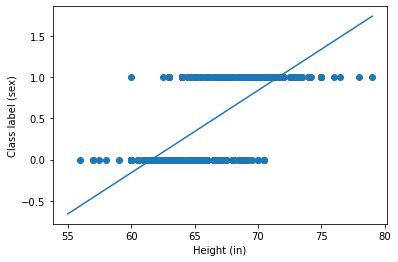

In [82]:
plt.scatter(galton.childHeight, galton.indicator)
plt.plot(height, linreg)
plt.ylabel("Class label (sex)")
plt.xlabel("Height (in)")
plt.savefig("Linear-galton.png")

In [83]:
xcrit = (0.5 - lin.intercept ) / lin.slope
xcrit

66.59623104465066

Is anyone feeling a little ridiculous fitting a straight line to two collections of sex-disaggregated heights? 

The logistic function has a better domain for this task:

In [89]:
import sklearn
from sklearn.linear_model import LogisticRegression

In [90]:
# The magic command is LogisticRegression.fit(x,y)
clf = LogisticRegression(random_state=0).fit(galton.childHeight.values.reshape([-1,1]), galton.indicator.values.reshape([-1,1]))

/Users/Shared/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [92]:
# And the return data structure has attributes 
# .coef_ and .intercept_.
# Note you have to access them by clf.coef_[0]
clf.coef_

array([[0.79976927]])

In [93]:
clf.intercept_

array([-53.18723093])

$$ Logistic(x; c_0, c_1) = {1 \over {1 + e^{- c_1 x - c_0} } } $$

In [94]:
# So here is the logistic function, invested with the fitted values:
logistic = 1 / (1+np.exp( - clf.coef_[0] * height - clf.intercept_[0]))

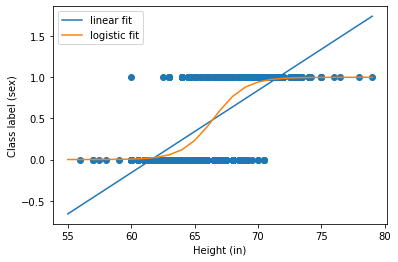

In [95]:
plt.scatter(galton.childHeight, galton.indicator)
plt.plot(height, linreg, label="linear fit")
plt.plot(height, logistic, label="logistic fit")
plt.ylabel("Class label (sex)")
plt.xlabel("Height (in)")
plt.legend()
plt.savefig("Linear-galton2.png")

In [96]:
#  Though we asked for scipy to do the logistic regression for us, 
#  let us construct the logistic loss function so that we can look at it:

# Evaluate the logistic function and the linear discriminator function
# at all the data points:
logg =  1 / (1+np.exp( - clf.coef_[0] * galton.childHeight.values - clf.intercept_[0]))
line = lin.intercept + lin.slope * galton.childHeight 

# Evaluate the respective log-likelihoods 
losslog = (galton.indicator ) * np.log(logg )+ (1-galton.indicator)*np.log(1-logg)
losslin = (line - galton.indicator)**2


Text(0.5, 0, 'Height')

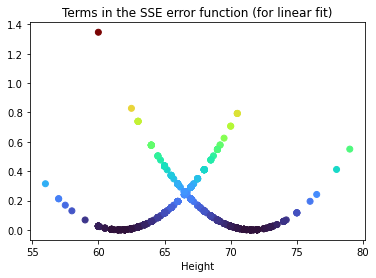

In [98]:
plt.scatter(galton.childHeight, losslin, c=losslin, cmap="turbo")
plt.title("Terms in the SSE error function (for linear fit)")
plt.xlabel("Height")

Text(0.5, 0, 'Height')

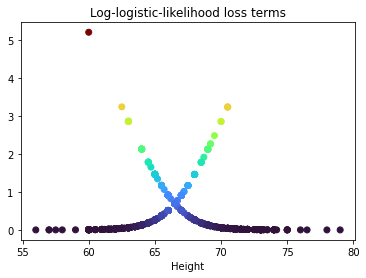

In [101]:
plt.scatter(galton.childHeight, -losslog, c=-losslog, cmap="turbo")
plt.title("Log-logistic-likelihood loss terms")
plt.xlabel("Height")


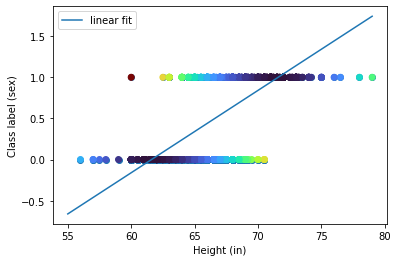

In [105]:
# Finally, I'm going to paint the scatterplot of gender vs. height 
# with colors according to the error terms.

plt.scatter(galton.childHeight, galton.indicator)
plt.scatter(galton.childHeight, galton.indicator, c=losslin, cmap="turbo")
#plt.scatter(galton.childHeight, losslog, c=losslin, cmap="turbo")
plt.plot(height, linreg, label="linear fit")

plt.ylabel("Class label (sex)")
plt.xlabel("Height (in)")
plt.legend()
plt.savefig("Linear-galton2c.png", bbox_inches="tight", dpi=300)

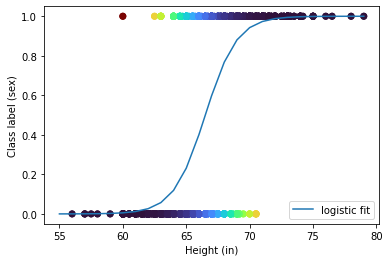

In [103]:
plt.scatter(galton.childHeight, galton.indicator, c=-losslog, cmap="turbo")
plt.scatter(galton.childHeight, galton.indicator, c=-losslog, cmap="turbo")
plt.plot(height, logistic, label="logistic fit")

plt.ylabel("Class label (sex)")
plt.xlabel("Height (in)")
plt.legend()
plt.savefig("Logistic-galton2c.png", bbox_inches="tight", dpi=300)

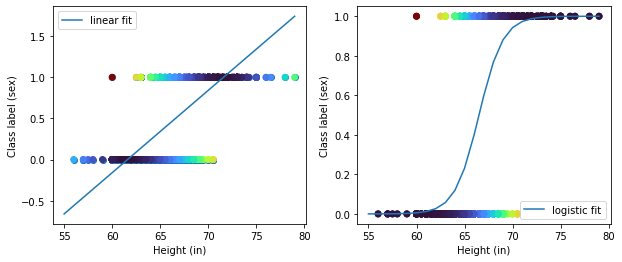

In [113]:
plt.figure(figsize=(10, 4))
plt.subplot(121 )
plt.scatter(galton.childHeight, galton.indicator)
plt.scatter(galton.childHeight, galton.indicator, c=losslin, cmap="turbo")
#plt.scatter(galton.childHeight, losslog, c=losslin, cmap="turbo")
plt.plot(height, linreg, label="linear fit")

plt.ylabel("Class label (sex)")
plt.xlabel("Height (in)")
plt.legend()
plt.subplot(122)
plt.scatter(galton.childHeight, galton.indicator, c=-losslog, cmap="turbo")
plt.scatter(galton.childHeight, galton.indicator, c=-losslog, cmap="turbo")
plt.plot(height, logistic, label="logistic fit")

plt.ylabel("Class label (sex)")
plt.xlabel("Height (in)")
plt.legend()